In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
import pickle

## Load the GT

In [11]:
gt_labels_in = pickle.load(open("/Users/markusbonse/Desktop/Results_spectral_VAE/gt_label.pkl", 'rb'),
                           encoding='latin1')
gt_spectra_in = pickle.load(open("/Users/markusbonse/Desktop/Results_spectral_VAE/gt_spectra.pkl", 'rb'),
                            encoding='latin1')

In [12]:
gt_labels = gt_labels_in[0, :, :]
gt_variances = 1./gt_labels_in[1, :, :]

/Users/markusbonse/Documents/MPI_Tübingen/40_code/venv_vae_spectra/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


## Load Prediction

In [14]:
pred_labels_in = pickle.load(open("/Users/markusbonse/Desktop/Results_spectral_VAE/pred_label.pkl", 'rb'), 
                             encoding='latin1')
pred_spectra_in = pickle.load(open("/Users/markusbonse/Desktop/Results_spectral_VAE/pred_spectra.pkl", 'rb'), 
                              encoding='latin1')

In [15]:
pred_labels = pred_labels_in[0, :, :]

## Compute Chi^2 errors

In [29]:
errors_mean = np.mean((gt_labels - pred_labels)**2 * gt_labels_in[1, :, :],
                      axis = 0)
errors_mean

array([ 0.08649834, 11.48224333,  1.11825277,  2.60398337,  0.90810519,
        1.17096465,  1.79985033])

In [28]:
errors_median = np.median((gt_labels - pred_labels)**2 * gt_labels_in[1, :, :],
                          axis = 0)
errors_median

array([0.01723489, 1.57294707, 0.27545517, 0.55184514, 0.37017371,
       0.25964628, 0.31997111])

# Label Plots

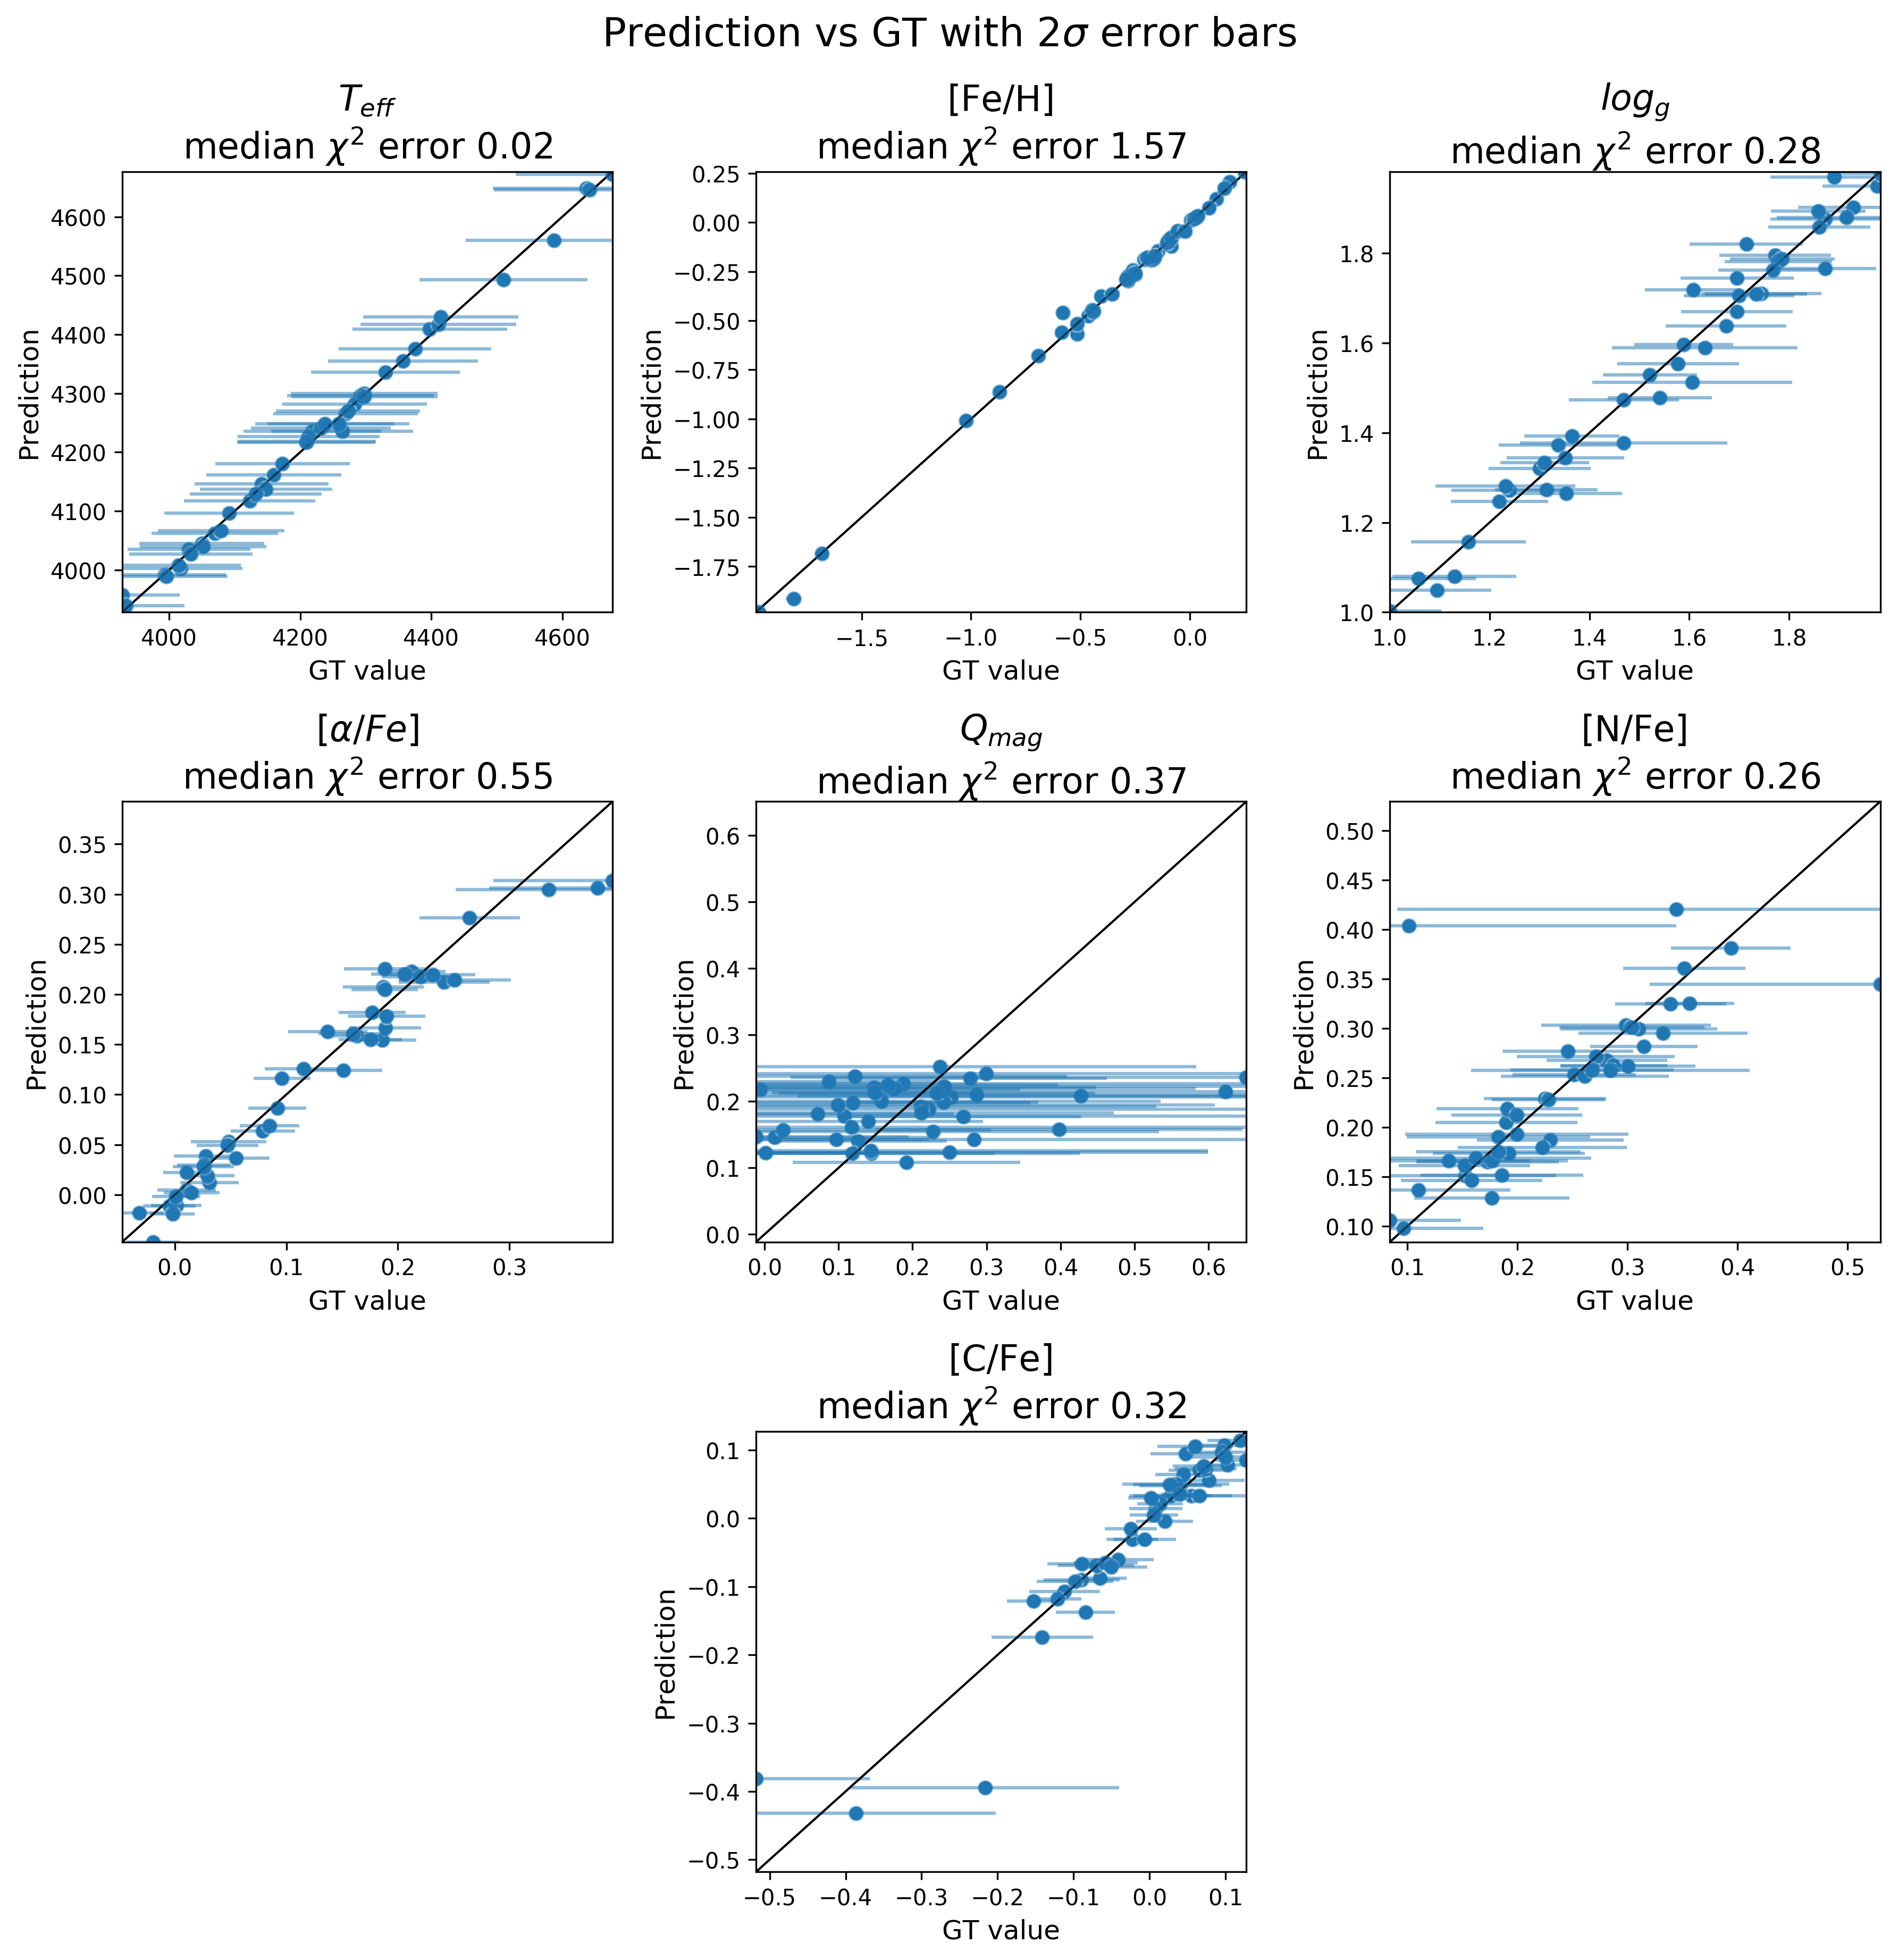

In [42]:
import math

fig = plt.figure(num=None, figsize=(12, 12), 
           dpi=300, 
           facecolor='w', 
           edgecolor='k')

sub_plots = [331, 332, 333, 334, 335, 336, 338]
subset= 50

label_names = [r"$T_{eff}$", r"[Fe/H]", r"$log_g$",
               r"[$\alpha/Fe$]", r"$Q_{mag}$", r"[N/Fe]",
               r"[C/Fe]"]

for label_dim, plot in enumerate(sub_plots):
    plt.subplot(plot)
    
    tmp_name = label_names[label_dim]
    
    y = pred_labels[:,label_dim]
    x = gt_labels[:,label_dim]
    x_error = np.sqrt(gt_variances)*2 # two sigma ~ 95%
    x_error[np.where(x_error == np.inf)] = 1000 # inf save plotting
    tmp_error = x_error[:y.shape[0], label_dim]
    
    x = x[::subset]
    y = y[::subset]
    tmp_error = tmp_error[::subset]
    
    plt.scatter(x, y,
                s=50,
                edgecolor="w",
                cmap="inferno", 
                alpha=1.0)
    
    range_min = np.min(np.vstack([x, y]))
    range_max = np.max(np.vstack([x, y]))
    
    plt.plot([range_min,range_max],[range_min,range_max], c="black", lw=1)

    plt.ylim(range_min, range_max)
    plt.xlim(range_min, range_max)
    
    plt.errorbar(x, y, xerr=tmp_error, fmt='o', alpha=0.5)
    
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, 
                                             range=[[range_min, range_max],
                                                    [range_min, range_max]])
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    #plt.imshow(heatmap.T, extent=extent, origin='lower', cmap="binary")

    plt.xlabel("GT value",
               fontsize=12)
    plt.ylabel("Prediction",
               fontsize=12)
    plt.title(tmp_name +"\n"+ r"median $\chi^2$ error " + 
              str("%.2f" % errors_median[label_dim]), 
              fontsize=16)
    
st = fig.suptitle(r"Prediction vs GT with $2\sigma$ error bars", 
                  fontsize=18)
st.set_y(1.02)

plt.tight_layout()
plt.show()

## Spectra Plots

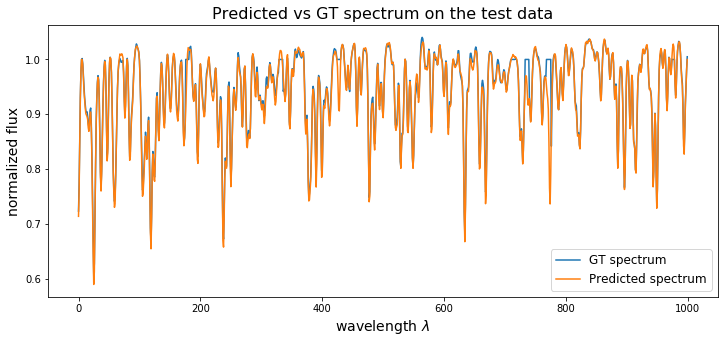

In [41]:
plt.figure(figsize=(12, 5))
id_in = 21

plt.plot(np.arange(1000),
         gt_spectra_in[0, 4, 4000:5000],
         label="GT spectrum")

plt.plot(np.arange(1000), 
         pred_spectra_in[0, 4, 4000:5000],
         label="Predicted spectrum")

plt.xlabel("wavelength $\lambda$", size=14)
plt.ylabel("normalized flux", size=14)
plt.title("Predicted vs GT spectrum on the test data", size=16)
plt.legend(prop={'size': 12})